# Install ORTEGA

In [25]:
!pip install ortega

In [1]:
import pandas as pd
import ortega

# Read movement data of two moving entities
The input data must contain following fields: unique id for the two moving entities, and longitude, latitude, and local time for each tracking point.

The time field must be converted to datetime type and the value must contains year, month, day, hour, minute, and second. 

In [2]:
bigdata = pd.read_csv('/path/Mother_Cub1.csv', sep=',',header=0)
bigdata['Time_LMT'] = pd.to_datetime(bigdata.Time_LMT)
print('total number of gps points:', bigdata.shape[0])

total number of gps points: 10414


# Initializing ORTEGA object
Parameters of ORTEGA class:
1. start_time, end_time: They can be used to select the portion of movement data that falls in this time interval.
2. minute_delay: The allowable time lag parameter in minutes. Usually, this number should be greater than the temporal resolution of movement data.
3. max_el_time_min: If the time interval between two consecutive points is larger than this parameter, ORTEGA will not create PPA and treat this time interval as a stationary activity when individuals are not moving.
4. latitude_field, longitude_field, id_field, time_field: users need to specify the field names based on the data they used.

In [3]:
interaction1 = ortega.ORTEGA(data=bigdata,
                             start_time='2020-01-01 00:00:00',  ##set a time window to subset data
                             end_time='2020-01-10 00:00:00',
                             minute_delay=60,
                             time_field='Time_LMT',
                             id_field='idcollar',
                             )

2023-02-17 11:13:14.037618 Initializing ORTEGA object...
2023-02-17 11:13:14.041868 Generate PPA list for the two moving entities...
2023-02-17 11:13:14.120362 Generating PPA list completed!
2023-02-17 11:13:14.186247 Initialization success!


# implement interaction analysis

The below cell runs interaction_analysis() and it returns three values. 
- The first value is a list of intersecting PPA pairs as paired built-in Ellipse objects.
- The second return value is a dataframe containing all intersecting PPA pairs. 
- The third return value is a dataframe that includes all identified continuous interaction segments (interaction events).

In [4]:
intersecting_ellipse_list, df_intersecting_PPAs, df_duration = interaction1.interaction_analysis()

2023-02-17 11:13:18.071982 Implement interaction analysis...
2023-02-17 11:13:18.072203 Getting spatial and temporal intersection pairs...
2023-02-17 11:13:18.379693 Getting spatial and temporal intersection pairs completed!
2023-02-17 11:13:18.379842 Complete! 168 pairs of intersecting PPAs found!
2023-02-17 11:13:18.397803 Compute duration of interaction...
2023-02-17 11:13:18.410372 Complete! 13 interaction events identified!


The beblow results indicate 10 interaction events between these two moving entities.
The dataframe df_duration includes six columns: 
- No: event no. sorted by start time
- P1: unique id for individual 1
- P2: unique id for individual 2
- Start: start time of the interaction
- End: end time of the interaction
- Duration: duration of the interaction event (in minutes)

In [5]:
df_duration

,No,P1,P2,Start,End,Duration
0,1,131343,229012,2020-01-01 13:00:00,2020-01-01 22:00:00,540.0
1,2,131343,229012,2020-01-02 00:00:00,2020-01-02 08:00:00,480.0
2,3,131343,229012,2020-01-02 15:00:00,2020-01-03 09:00:00,1080.0
3,4,131343,229012,2020-01-03 12:00:00,2020-01-03 16:00:00,240.0
4,5,131343,229012,2020-01-03 18:00:00,2020-01-04 02:00:00,480.0
5,6,131343,229012,2020-01-04 05:00:00,2020-01-04 08:00:00,180.0
6,7,131343,229012,2020-01-04 11:00:00,2020-01-04 21:00:00,600.0
7,8,131343,229012,2020-01-06 05:00:00,2020-01-06 13:00:00,480.0
8,9,131343,229012,2020-01-06 16:00:00,2020-01-06 21:00:00,300.0
9,10,131343,229012,2020-01-07 18:00:00,2020-01-07 22:00:00,240.0


# Compute PPA size and use violin plots to show the distribution

In [6]:
ppasize_list = interaction1.compute_ppa_size()

Descriptive statistics of PPA ellipses length for id 131343:
count    211.000000
mean       0.009065
std        0.015187
min        0.000013
25%        0.000434
50%        0.001192
75%        0.010480
max        0.092675
dtype: float64
Descriptive statistics of PPA ellipses length for id 229012:
count    208.000000
mean       0.003474
std        0.007428
min        0.000017
25%        0.000306
50%        0.000635
75%        0.002310
max        0.072471
dtype: float64


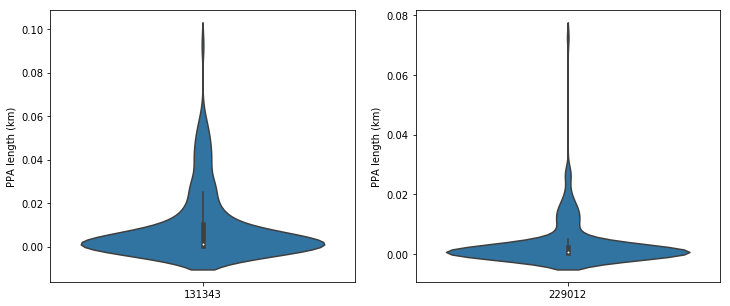

In [7]:
import seaborn
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
seaborn.violinplot(data=ppasize_list[0], ax=ax1)
seaborn.violinplot(data=ppasize_list[1], ax=ax2)
ax1.set_xticklabels([str(interaction1.id1)])
ax2.set_xticklabels([str(interaction1.id2)])
ax1.set_ylabel('PPA length (km)')
ax2.set_ylabel('PPA length (km)')
plt.show()

# Compute PPA interval and use violin plot to show the distribution

In [8]:
interval_list = interaction1.compute_ppa_interval()

Descriptive statistics of PPA ellipses time interval (minutes) for id 131343:
count    211.000000
mean      61.421801
std        9.237981
min       57.000000
25%       60.000000
50%       60.000000
75%       60.000000
max      122.000000
Name: Time_LMT, dtype: float64
Descriptive statistics of PPA ellipses time interval (minutes) for id 229012:
count    208.000000
mean      62.307692
std       18.547538
min       57.000000
25%       60.000000
50%       60.000000
75%       60.000000
max      300.000000
Name: Time_LMT, dtype: float64


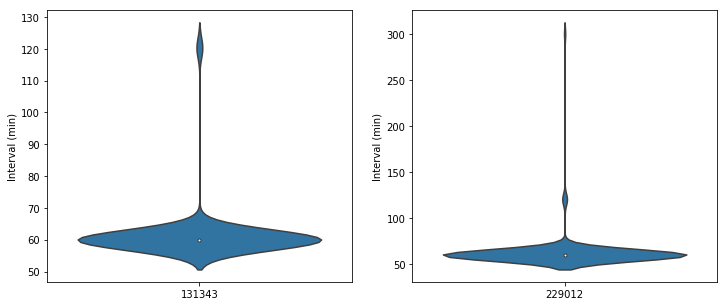

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
seaborn.violinplot(data=interval_list[0].tolist(), ax=ax1)
seaborn.violinplot(data=interval_list[1].tolist(), ax=ax2)
ax1.set_xticklabels([interaction1.id1])
ax2.set_xticklabels([interaction1.id2])
ax1.set_ylabel('Interval (min)')
ax2.set_ylabel('Interval (min)')
plt.show()

# Map the results of interaction analysis
two tracks are shown in blue and red ellipses respectively, intersecting PPAs are highlighted in yellow

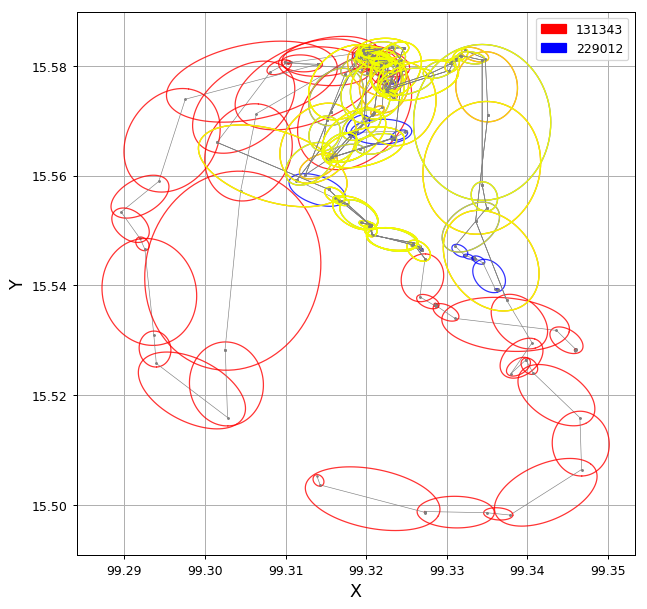

In [10]:
ortega.visualization.plot_interaction(interaction1, intersecting_ellipse_list)

map the original tracks without annotating intersecting portion

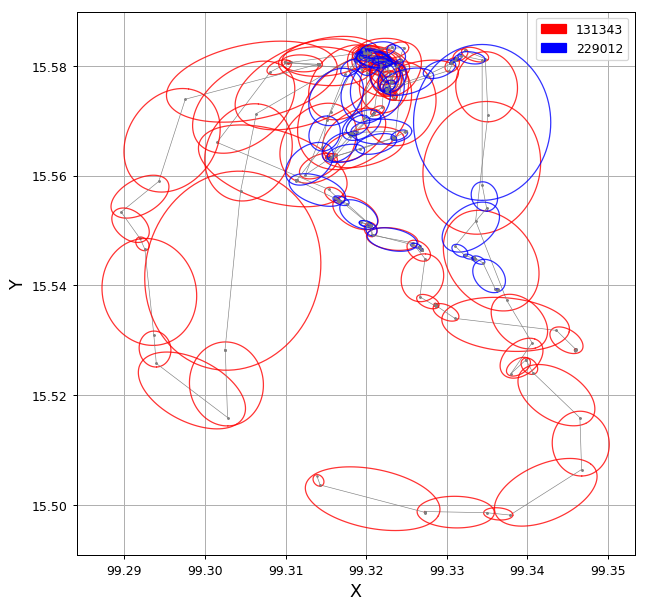

In [11]:
ortega.visualization.plot_original_tracks(interaction1) 

# Explore the difference in speed and movement  direction when individuals interact

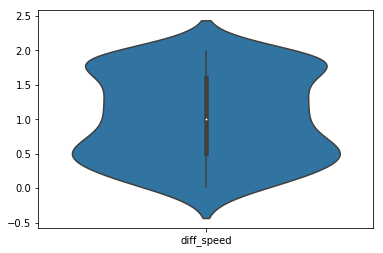

In [12]:
ax = seaborn.violinplot(data=df_intersecting_PPAs['diff_speed'])
ax.set_xticklabels(['diff_speed'])
plt.show()

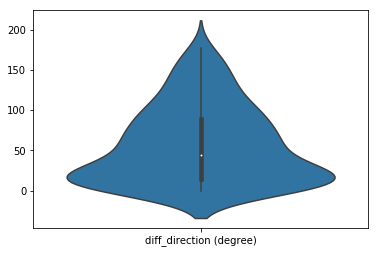

In [13]:
ax = seaborn.violinplot(data=df_intersecting_PPAs['diff_direction'])
ax.set_xticklabels(['diff_direction (degree)'])
plt.show()